A* search

In [1]:
#a*
from heapq import heappush, heappop

def astar(start, goal, h, neighbors):
    open_set = [(h(start), 0, start, [start])]
    visited = set()
    while open_set:
        est, cost, node, path = heappop(open_set)
        if node == goal: return path
        if node in visited: continue
        visited.add(node)
        for neigh, w in neighbors(node):
            if neigh not in visited:
                g = cost + w
                heappush(open_set, (g + h(neigh), g, neigh, path + [neigh]))

# Example graph
graph = {
    'A': {'B': 1, 'C': 3},
    'B': {'D': 1, 'E': 5},
    'C': {'F': 2},
    'D': {}, 'E': {}, 'F': {}
}

def neighbors(n): return [(k, v) for k, v in graph[n].items()]
def h(n): return {'A':4, 'B':3, 'C':2, 'D':0, 'E':0, 'F':0}[n]

print(astar('A', 'D', h, neighbors))

['A', 'B', 'D']


IDDFS

In [2]:
#iddfs
def dls(g, node, depth, visited):
    if depth >= 0:
        print(node, end=" ")
        visited.add(node)
        if depth:
            for n in g[node]:
                if n not in visited:
                    dls(g, n, depth-1, visited)

def iddfs(g, start, max_depth):
    for d in range(max_depth+1):
        dls(g, start, d, set())

# Example usage
g = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [], 'E': [], 'F': []
}
iddfs(g, 'A', 3)


A A B C A B D E C F A B D E C F 

a* search 2

Path found: [1, 2, 3, 7, 8, 9]


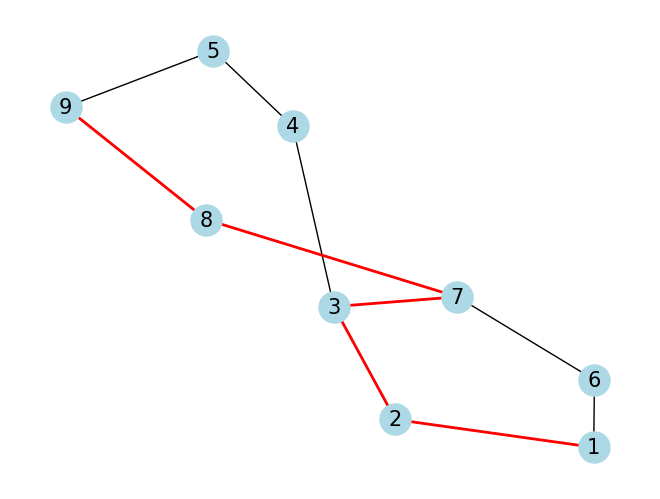

In [3]:
#A* Search
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def a_star_search(G, start, goal):
    # Heuristic function for A* search
    def heuristic(node):
        return abs(node-goal)

    # Priority queue for nodes to explore
    frontier = [(0, start)]  # (cost + heuristic, node)
    came_from = {start: None}
    cost_so_far = {start: 0}

    while frontier:
        current_cost, current_node = heapq.heappop(frontier)

        if current_node == goal:
            return reconstruct_path(came_from, start, goal)

        for neighbor in G.neighbors(current_node):
            new_cost = cost_so_far[current_node] + G[current_node][neighbor].get('weight', 1)
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor)
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor] = current_node

    return None

def reconstruct_path(came_from, start, goal):
    path = []
    node = goal
    while node:
        path.append(node)
        node = came_from[node]
    return path[::-1]

def display_graph_and_path(G, path):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=15)
    if path:
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='r', width=2)
    plt.show()

# Example usage
G = nx.Graph()
G.add_weighted_edges_from([
    (1, 2, 1), (2, 3, 2), (3, 4, 1), (4, 5, 3),
    (1, 6, 5), (6, 7, 2), (7, 8, 1), (8, 9, 1),
    (5, 9, 1), (3, 7, 1)
])

start_node, goal_node = 1, 9
path = a_star_search(G, start_node, goal_node)
print("Path found:", path)
display_graph_and_path(G, path)